# Python Data Analysis Series: Day 3!
## Medical Data Visualizer

<img src = https://www.ispartnersllc.com/wp-content/uploads/interoperability-and-healthcare-compliance.jpg width = "1000" height = "100" > 

### Today's Challenge:
In this project, we will explore medical examination data using matplotlib, seaborn, and pandas. The dataset contains valuable information collected during medical examinations, covering aspects such as body measurements, blood test results, and lifestyle choices. Our goal is to visualize this data, make insightful calculations, and unveil the relationships between cardiac disease, body metrics, blood markers, and lifestyle preferences.

### Key Data Analytics Objectives:
- Visualize distinctions between individuals with and without cardiovascular disease concerning physical activity, alcohol intake, cholesterol, glucose, overweight, and smoking.
- Construct a heatmap to reveal the correlation between a comprehensive set of variables including age, gender, height, weight, systolic and diastolic blood pressure, cholesterol, glucose, smoking, alcohol intake, physical activity, presence or absence of cardiovascular disease, and overweight.

### Dataset and Library:

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('medical_examination.csv')
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


### Solution 1:

Defining overweight and normalizing glucose and cholesterol numbers

In [16]:
df.loc[df['weight']/(df['height']/100)**2 <= 25, 'overweight'] = 0
df.loc[df['weight']/(df['height']/100)**2 > 25, 'overweight'] = 1


df.loc[df['cholesterol'] <= 1 , 'cholesterol'] = 0
df.loc[df['cholesterol'] > 1 , 'cholesterol'] = 1
df.loc[df['gluc'] <= 1 , 'gluc'] = 0
df.loc[df['gluc'] > 1 , 'gluc'] = 1

Preparing the df_cat table ready for visualization use

In [17]:
df_cat = pd.melt(df, id_vars =['cardio'], 
                 value_vars =['active','alco','cholesterol', 
                              'gluc','overweight','smoke'])

# calculating each variables of presence or absence of cardiovascular
df_cat.loc[(df_cat['cardio'] == 0) & (df_cat['variable'] == 'active') 
           & (df_cat['value'] == 1), 'Total'] = len(df_cat[(df_cat['cardio'] == 0) 
            & (df_cat['variable'] == 'active') & (df_cat['value'] == 1)])
df_cat.loc[(df_cat['cardio'] == 0) & (df_cat['variable'] == 'active') 
           & (df_cat['value'] == 0), 'Total'] = len(df_cat[(df_cat['cardio'] == 0) 
            & (df_cat['variable'] == 'active') & (df_cat['value'] == 0)])
df_cat.loc[(df_cat['cardio'] == 0) & (df_cat['variable'] == 'alco') 
           & (df_cat['value'] == 1), 'Total'] = len(df_cat[(df_cat['cardio'] == 0) 
            & (df_cat['variable'] == 'alco') & (df_cat['value'] == 1)])
df_cat.loc[(df_cat['cardio'] == 0) & (df_cat['variable'] == 'alco') 
           & (df_cat['value'] == 0), 'Total'] = len(df_cat[(df_cat['cardio'] == 0) 
            & (df_cat['variable'] == 'alco') & (df_cat['value'] == 0)])
df_cat.loc[(df_cat['cardio'] == 0) & (df_cat['variable'] == 'cholesterol') 
           & (df_cat['value'] == 1), 'Total'] = len(df_cat[(df_cat['cardio'] == 0) 
            & (df_cat['variable'] == 'cholesterol') & (df_cat['value'] == 1)])
df_cat.loc[(df_cat['cardio'] == 0) & (df_cat['variable'] == 'cholesterol')
           & (df_cat['value'] == 0), 'Total'] = len(df_cat[(df_cat['cardio'] == 0) 
            & (df_cat['variable'] == 'cholesterol') & (df_cat['value'] == 0)])
df_cat.loc[(df_cat['cardio'] == 0) & (df_cat['variable'] == 'gluc') 
           & (df_cat['value'] == 1), 'Total'] = len(df_cat[(df_cat['cardio'] == 0) 
            & (df_cat['variable'] == 'gluc') & (df_cat['value'] == 1)])
df_cat.loc[(df_cat['cardio'] == 0) & (df_cat['variable'] == 'gluc') 
           & (df_cat['value'] == 0), 'Total'] = len(df_cat[(df_cat['cardio'] == 0) 
            & (df_cat['variable'] == 'gluc') & (df_cat['value'] == 0)])
df_cat.loc[(df_cat['cardio'] == 0) & (df_cat['variable'] == 'overweight') 
           & (df_cat['value'] == 1), 'Total'] = len(df_cat[(df_cat['cardio'] == 0) 
            & (df_cat['variable'] == 'overweight') & (df_cat['value'] == 1)])
df_cat.loc[(df_cat['cardio'] == 0) & (df_cat['variable'] == 'overweight') 
           & (df_cat['value'] == 0), 'Total'] = len(df_cat[(df_cat['cardio'] == 0) 
            & (df_cat['variable'] == 'overweight') & (df_cat['value'] == 0)])
df_cat.loc[(df_cat['cardio'] == 0) & (df_cat['variable'] == 'smoke') 
           & (df_cat['value'] == 1), 'Total'] = len(df_cat[(df_cat['cardio'] == 0) 
            & (df_cat['variable'] == 'smoke') & (df_cat['value'] == 1)])
df_cat.loc[(df_cat['cardio'] == 0) & (df_cat['variable'] == 'smoke') 
           & (df_cat['value'] == 0), 'Total'] = len(df_cat[(df_cat['cardio'] == 0) 
            & (df_cat['variable'] == 'smoke') & (df_cat['value'] == 0)])


df_cat.loc[(df_cat['cardio'] == 1) & (df_cat['variable'] == 'active') 
           & (df_cat['value'] == 1), 'Total'] = len(df_cat[(df_cat['cardio'] == 1) 
            & (df_cat['variable'] == 'active') & (df_cat['value'] == 1)])
df_cat.loc[(df_cat['cardio'] == 1) & (df_cat['variable'] == 'active') 
           & (df_cat['value'] == 0), 'Total'] = len(df_cat[(df_cat['cardio'] == 1) 
            & (df_cat['variable'] == 'active') & (df_cat['value'] == 0)])
df_cat.loc[(df_cat['cardio'] == 1) & (df_cat['variable'] == 'alco') 
           & (df_cat['value'] == 1), 'Total'] = len(df_cat[(df_cat['cardio'] == 1) 
            & (df_cat['variable'] == 'alco') & (df_cat['value'] == 1)])
df_cat.loc[(df_cat['cardio'] == 1) & (df_cat['variable'] == 'alco') 
           & (df_cat['value'] == 0), 'Total'] = len(df_cat[(df_cat['cardio'] == 1) 
            & (df_cat['variable'] == 'alco') & (df_cat['value'] == 0)])
df_cat.loc[(df_cat['cardio'] == 1) & (df_cat['variable'] == 'cholesterol') 
           & (df_cat['value'] == 1), 'Total'] = len(df_cat[(df_cat['cardio'] == 1) 
            & (df_cat['variable'] == 'cholesterol') & (df_cat['value'] == 1)])
df_cat.loc[(df_cat['cardio'] == 1) & (df_cat['variable'] == 'cholesterol') 
           & (df_cat['value'] == 0), 'Total'] = len(df_cat[(df_cat['cardio'] == 1) 
            & (df_cat['variable'] == 'cholesterol') & (df_cat['value'] == 0)])
df_cat.loc[(df_cat['cardio'] == 1) & (df_cat['variable'] == 'gluc') 
           & (df_cat['value'] == 1), 'Total'] = len(df_cat[(df_cat['cardio'] == 1) 
            & (df_cat['variable'] == 'gluc') & (df_cat['value'] == 1)])
df_cat.loc[(df_cat['cardio'] == 1) & (df_cat['variable'] == 'gluc') 
           & (df_cat['value'] == 0), 'Total'] = len(df_cat[(df_cat['cardio'] == 1) 
            & (df_cat['variable'] == 'gluc') & (df_cat['value'] == 0)])
df_cat.loc[(df_cat['cardio'] == 1) & (df_cat['variable'] == 'overweight') 
           & (df_cat['value'] == 1), 'Total'] = len(df_cat[(df_cat['cardio'] == 1) 
            & (df_cat['variable'] == 'overweight') & (df_cat['value'] == 1)])
df_cat.loc[(df_cat['cardio'] == 1) & (df_cat['variable'] == 'overweight') 
           & (df_cat['value'] == 0), 'Total'] = len(df_cat[(df_cat['cardio'] == 1) 
            & (df_cat['variable'] == 'overweight') & (df_cat['value'] == 0)])
df_cat.loc[(df_cat['cardio'] == 1) & (df_cat['variable'] == 'smoke') 
           & (df_cat['value'] == 1), 'Total'] = len(df_cat[(df_cat['cardio'] == 1) 
            & (df_cat['variable'] == 'smoke') & (df_cat['value'] == 1)])
df_cat.loc[(df_cat['cardio'] == 1) & (df_cat['variable'] == 'smoke') 
           & (df_cat['value'] == 0), 'Total'] = len(df_cat[(df_cat['cardio'] == 1) 
            & (df_cat['variable'] == 'smoke') & (df_cat['value'] == 0)])

df_cat.sort_values(by=['variable'])

,cardio,variable,value,Total
0,0,active,1.0,28643.0
46658,0,active,1.0,28643.0
46659,0,active,1.0,28643.0
46660,1,active,1.0,27618.0
46661,0,active,0.0,6378.0
...,...,...,...,...
373329,0,smoke,0.0,31781.0
373328,1,smoke,0.0,32050.0
373327,1,smoke,0.0,32050.0
373333,1,smoke,0.0,32050.0


### Objective 1:

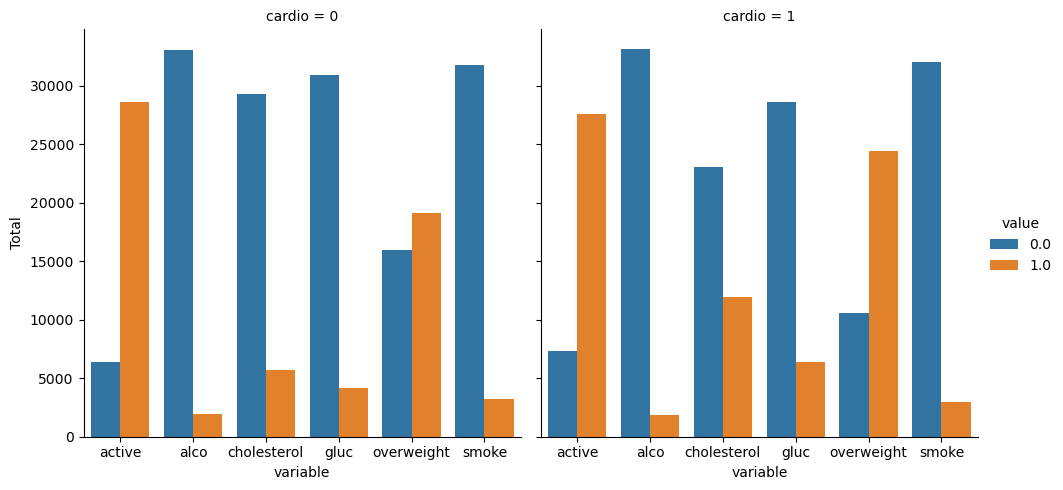

In [18]:
sns.catplot(data=df_cat, x='variable',y='Total', hue = 'value',col='cardio',kind='bar')

### Insights 1:

##### Individuals with cardiovascular disease are more likely to exhibit elevated cholesterol and glucose levels compared to those without the disease.

### Solution 2:

Data cleaning for height column

In [19]:
df_heat = df[(df['ap_lo'] <= df['ap_hi'])
   & (df['height'] >= df['height'].quantile(0.025))
   & (df['height'] <= df['height'].quantile(0.975))
   & (df['weight'] >= df['weight'].quantile(0.025))
   & (df['weight'] <= df['weight'].quantile(0.975))
  ]

Making the table of correlations matrix for each variable and Generating a mask for the upper triangle matrix

In [20]:
df.corr()

df.rename(columns={"sex": "gender"})
mask = np.triu(np.ones_like(df_heat.corr()))

### Objective 2:

<Axes: >

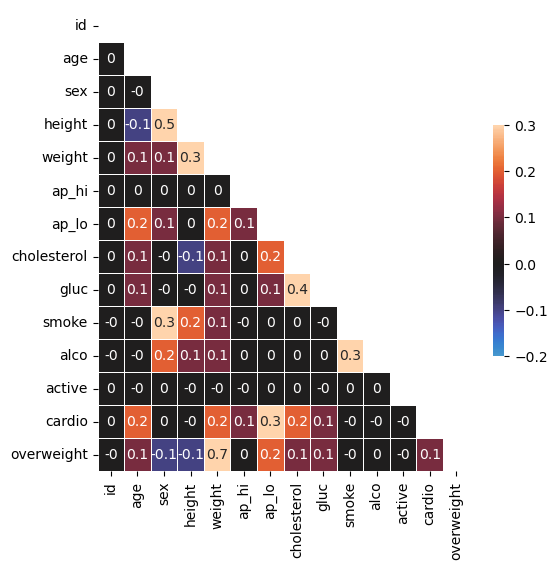

In [21]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(df_heat.corr().round(1), mask=mask,linewidths=0.5, linecolor= "white",vmin=-0.2, vmax=0.3 , center = 0, annot = True, cbar_kws={"shrink": 0.5})

### Insights 2:

##### Weight and overweight exhibit a very strong positive correlation, representing the highest correlation within the variables. Additionally, cholesterol and glucose levels demonstrate a moderate positive correlation.